In [1]:
import numpy as np
from bezierv.classes.distfit import DistFit
from bezierv.classes.bezierv import Bezierv
import matplotlib.pyplot as plt

In [2]:
np.random.seed(111)

In [6]:
data = np.sort(np.random.normal(loc=1, scale=1, size=100))
distfit = DistFit(data=data, n=3)
bezierv_sub, mse_sub = distfit.fit(method='projsubgrad', max_iter_PS=100)
bezierv_grad, mse_grad = distfit.fit(method='projgrad', max_iter_PG=100)
bezierv_non, mse_non = distfit.fit(method='nonlinear')
bezierv_nm, mse_nm = distfit.fit(method='neldermead')

In [7]:
print(mse_sub)
print(mse_grad)
print(mse_non)
print(mse_nm)

0.002743268308041036
0.0027386638457031942
0.0003029557862260062
0.00030567964977123947


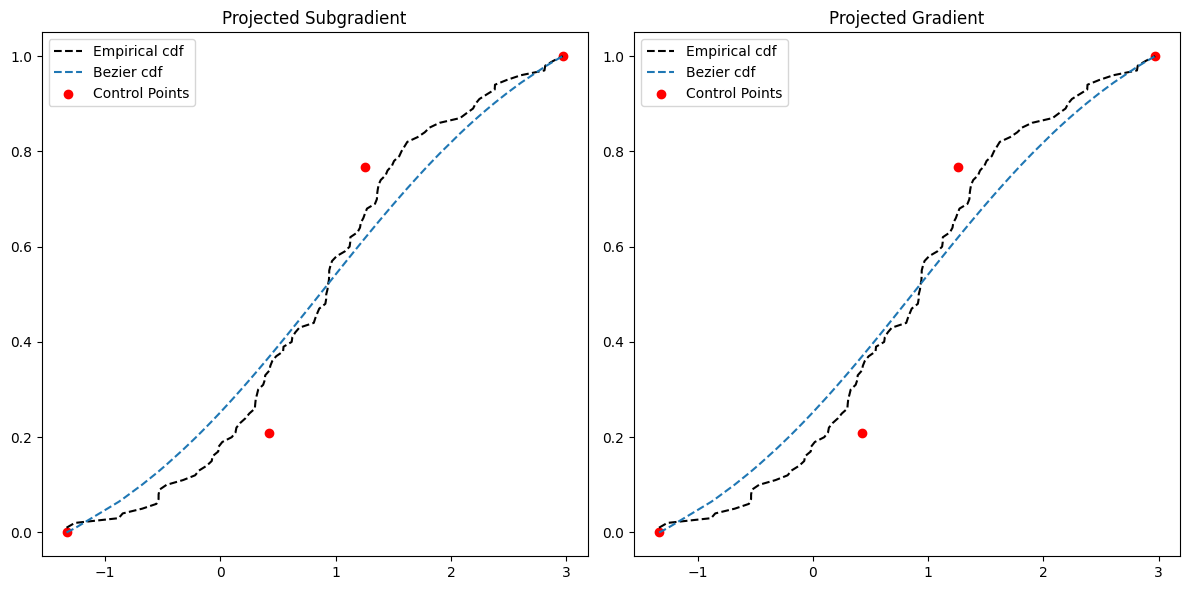

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

bezierv_sub.plot_cdf(data, ax=ax1)

bezierv_grad.plot_cdf(data, ax=ax2)

# Add a title to the subplots
ax1.set_title('Projected Subgradient')
ax2.set_title('Projected Gradient')

# Show the plot
plt.tight_layout()
plt.show()

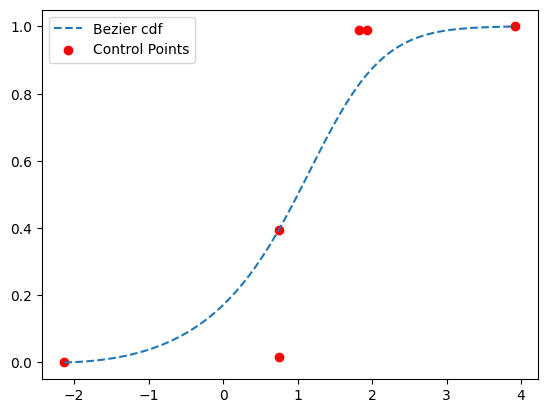

In [5]:
data = np.random.normal(loc=1, scale=1, size=500)
distfit = DistFit(data=data)
bezierv_x = distfit.fit(method='nonlinear')
bezierv_x.plot_cdf()

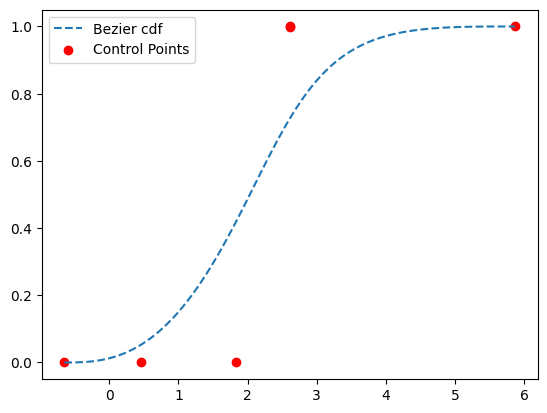

In [6]:
data = np.random.normal(loc=2, scale=1, size=500)
distfit = DistFit(data=data)
bezierv_y = distfit.fit(method='nonlinear')
bezierv_y.plot_cdf()

In [7]:
from bezierv.classes.convolver import Convolver
convolver = Convolver(bezierv_x, bezierv_y, 1000)
bezierv_conv, mse = convolver.conv(method='nonlinear')

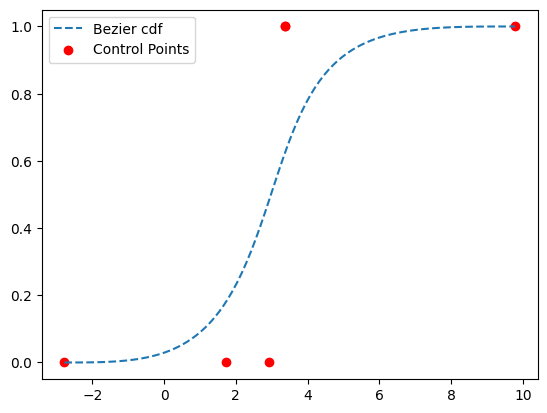

In [8]:
bezierv_conv.plot_cdf()